---

# 🎯 **Telco Customer Churn Prediction Project**

This project aims to predict whether a customer is likely to churn (leave the company) based on their service usage and personal data.  
We use data preprocessing, feature engineering, SMOTE resampling, and a logistic regression model to achieve high recall.

📁 Dataset: `Telco-Customer-Churn.csv`  
📊 Model Used: Logistic Regression  
📈 Target Metric: **Recall**  

---

## 📦 Importing Required Libraries

In this section, we import all the necessary libraries for the project.  
This includes data handling libraries like `pandas` and `numpy`, visualization tools like `matplotlib` and `seaborn`,  
as well as preprocessing, modeling, and evaluation tools from `sklearn`.  
We also include `SMOTE` from the `imblearn` library to handle class imbalance.

> 🔧 This step sets up the environment and is essential before moving to data processing and modeling.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

---

## 📂 Loading the Dataset

We load the Telco Customer Churn dataset using `pandas`.  
This dataset contains customer demographic and service usage details, which will be used to predict churn behavior.

In [1882]:
data = pd.read_csv('../Data/Telco-Customer-Churn.csv')

---

## 👀 Previewing the Dataset

We display the first five rows of the dataset using `data.head()` to get an initial understanding of the structure and contents.

In [1883]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---

## 🧾 Dataset Information

We use `data.info()` to get a concise summary of the dataset.

In [1884]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


---

## 📊 Descriptive Statistics

Using `data.describe().T`, we generate summary statistics for all numerical columns in the dataset.

In [1885]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


---

### 🔍 Checking for Missing Values

We check if there are any missing (null) values in the dataset. This is an essential step before proceeding with data preprocessing, as missing values can affect model performance.

In [1886]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

---

### 📊 Target Variable Distribution

Let's explore the distribution of the target variable `Churn` to see how many customers have churned (`Yes`) versus those who haven't (`No`). This helps us understand whether the dataset is imbalanced.

In [1887]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

---

### 🔄 Dropping Unnecessary Columns

We drop the `customerID` column as it is a unique identifier and does not contribute to the prediction of churn.

In [1888]:
data.drop('customerID', axis=1, inplace=True)

---

### 🧹 Detecting Invalid `TotalCharges` Entries

We check for rows in which the `TotalCharges` column cannot be converted to numeric values (due to spaces or invalid entries). These are potential data quality issues that need to be addressed.

In [1889]:
data[pd.to_numeric(data['TotalCharges'], errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


---

### 🔄 Converting `TotalCharges` to Numeric

We convert the `TotalCharges` column to numeric format. Invalid entries are coerced to `NaN`.  
After conversion, we recheck for missing values in the dataset.

In [1890]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

---

### 🧼 Handling Missing Values

We fill the missing values in the `TotalCharges` column using the **median** of that column.  
After this operation, we verify that there are no more missing values in the dataset.

In [1891]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

---

### 📊 Checking Data Types

We examine the data types of each column to determine which features are numerical and which are categorical.  
This helps in deciding how to preprocess each column later (e.g., encoding categorical features, scaling numeric ones).

In [1892]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

---

### 🧹 Removing Duplicate Rows

We check for and remove any duplicate rows in the dataset to ensure the integrity and quality of the data.  
Duplicates can bias the model by giving more weight to repeated samples.

The code also prints how many duplicates were found and removed.

In [1893]:

data = data.drop_duplicates()
print( f'====================================\n Duplicated = {data.duplicated().sum()} \n====================================') 
data[data.duplicated()]

 Duplicated = 0 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


---

### 📊 Categorical Features vs Churn

This visualization explores the relationship between each **categorical feature** and the **Churn** variable.

- A `countplot` is used for each predictor, showing the distribution of customers who churned or not (`Yes` vs `No`) across each category.
- The plots are organized in a grid layout for better readability.
- Custom colors (`salmon` for "Yes" and `lightseagreen` for "No") are applied to clearly distinguish the classes.

These insights help identify patterns that may indicate customer churn based on certain attributes.

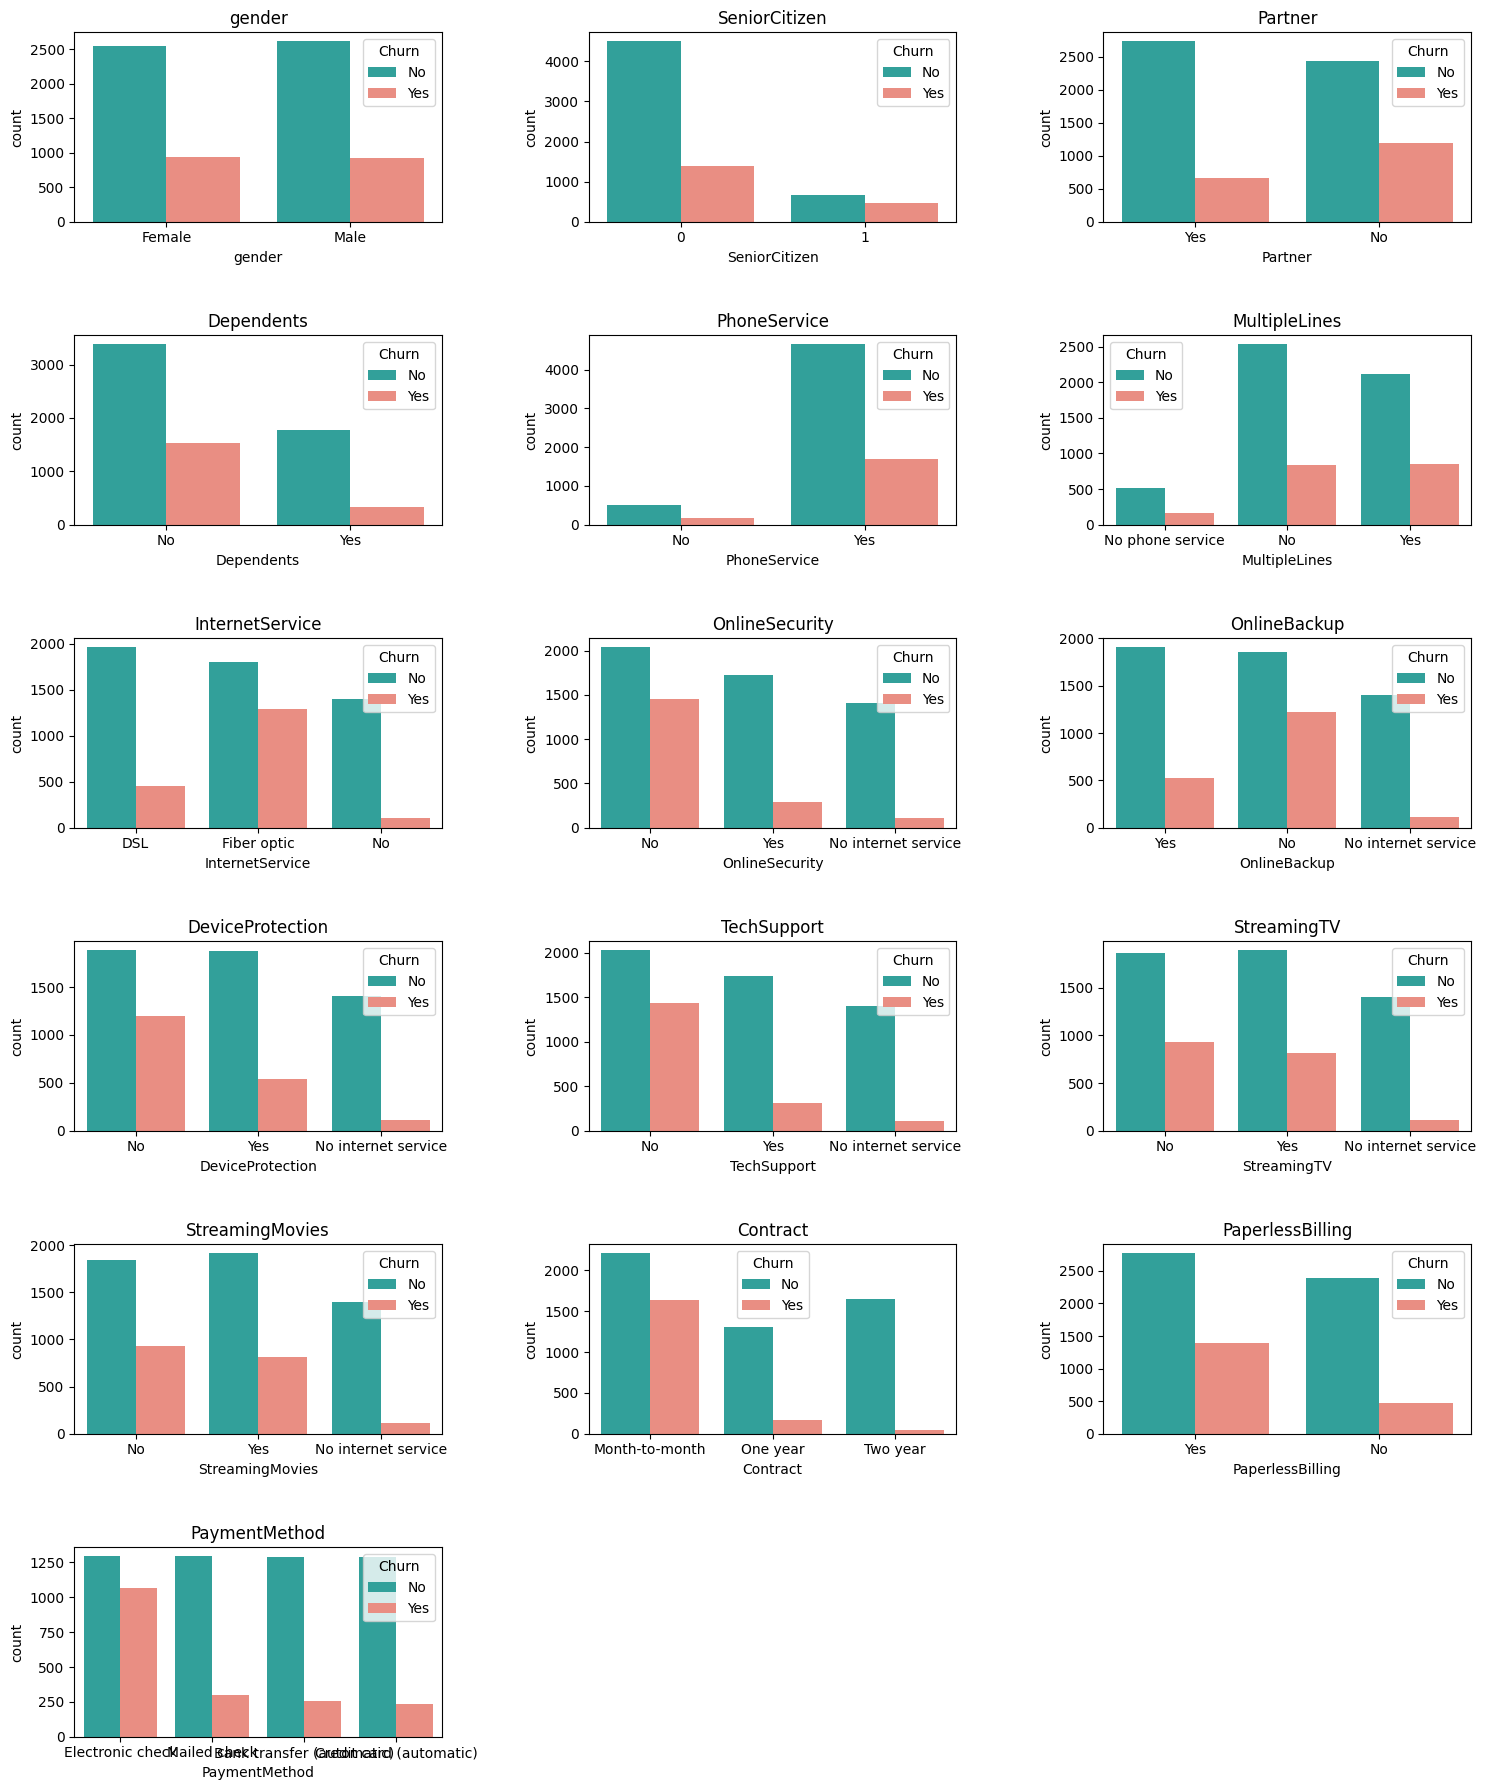

In [1894]:
predictors = data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure']).columns
n = len(predictors)

cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()

for i, predictor in enumerate(predictors):
    sns.countplot(
        data=data,
        x=predictor,
        hue='Churn',
        palette={'Yes': 'salmon', 'No': 'lightseagreen'},
        ax=axes[i]
    )
    axes[i].set_title(predictor)
    axes[i].tick_params(axis='x', rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()


---

### 📈 Churn Distribution Overview

This chart displays the overall distribution of customers who **churned** versus those who **did not**.

- A simple `countplot` is used to show the total number of `Yes` and `No` entries in the **Churn** column.
- This helps in identifying **class imbalance**, which is common in churn prediction datasets and needs to be addressed during model training.
- Custom color palette enhances visual clarity:  
  - 🟥 **Salmon** = Churned  
  - 🟩 **Light Sea Green** = Not Churned

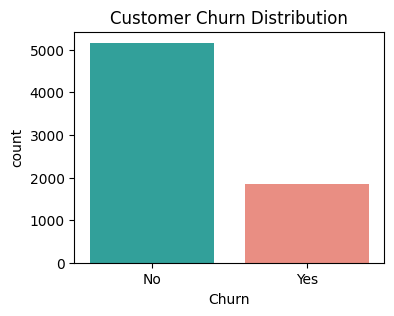

In [1895]:
plt.figure(figsize=(4, 3))
sns.countplot(data=data, x='Churn', hue='Churn',
              palette={'Yes': 'salmon', 'No': 'lightseagreen'})

plt.title("Customer Churn Distribution")
plt.show()

---

### 📊 Tenure Distribution by Churn Status

This **Kernel Density Estimation (KDE)** plot illustrates the distribution of customer **tenure** based on their churn status:

- **Tenure** refers to the number of months a customer has stayed with the service.
- The KDE curves are filled to provide a clearer visual comparison between churned and non-churned customers.
- **Observations**:
  - Customers with **shorter tenure** appear more likely to churn.
  - Those with **longer tenure** tend to stay.

The custom color palette highlights churn patterns:
- 🟥 **Salmon** = Customers who churned  
- 🟩 **Light Sea Green** = Customers who did not churn

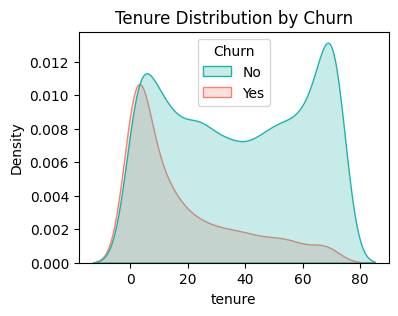

In [1896]:
plt.figure(figsize=(4, 3))
sns.kdeplot(data=data, x='tenure', hue='Churn', fill=True ,palette={'Yes': 'salmon', 'No': 'lightseagreen'})
plt.title("Tenure Distribution by Churn")
plt.show()

---

### 📑 Contract Type vs Churn

This count plot shows the relationship between the **type of customer contract** and their **churn behavior**:

- Three contract types are considered:
  - **Month-to-month**
  - **One year**
  - **Two year**
- The chart is color-coded by churn status:
  - 🟥 **Salmon** = Customers who churned  
  - 🟩 **Light Sea Green** = Customers who did not churn

**Insights**:
- Customers with **month-to-month contracts** are significantly more likely to churn.
- **Longer-term contracts** (one or two years) show a much lower churn rate.

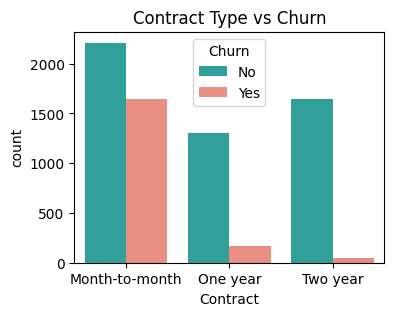

In [1897]:
plt.figure(figsize=(4, 3))
sns.countplot(data=data, x='Contract', hue='Churn',palette={'Yes': 'salmon', 'No': 'lightseagreen'})
plt.title("Contract Type vs Churn")
plt.show()

---

### 🔍 Identifying Numerical and Categorical Features

To prepare the dataset for preprocessing and modeling, we separate the features into two main types:

- **Numerical Columns**:
  These include all features with data types `float64` and `int64`, which represent continuous or discrete numeric values.

- **Categorical Columns**:
  These include all features with data type `object`, typically representing labels, categories, or text-based information.

This separation is essential for applying the appropriate transformation techniques (e.g., scaling numeric features and encoding categorical ones).

In [1898]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = data.select_dtypes(include='object').columns.tolist()

---

### 🧾 Listing Feature Types

After identifying the numerical and categorical columns, we print them to understand the structure of our dataset:

- **Numerical Columns**:
  These are features that contain numeric values and may require scaling.

- **Categorical Columns**:
  These features contain non-numeric data and will need to be encoded before feeding into a machine learning model.

This step provides clarity on which preprocessing methods to apply to each feature type.

In [1899]:
print(numerical_cols)
print(categorical_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


---

### 🔍 Correlation Matrix of Numerical Features

The heatmap below displays the **correlation coefficients** between the numerical variables in the dataset. This helps in understanding the linear relationships between features.

- **Dark colors** represent stronger correlations (positive or negative).
- **Lighter colors** indicate weaker or no correlation.
- This step is especially helpful in identifying multicollinearity and potential feature importance.

> Note: Only numerical columns are included in the correlation matrix.

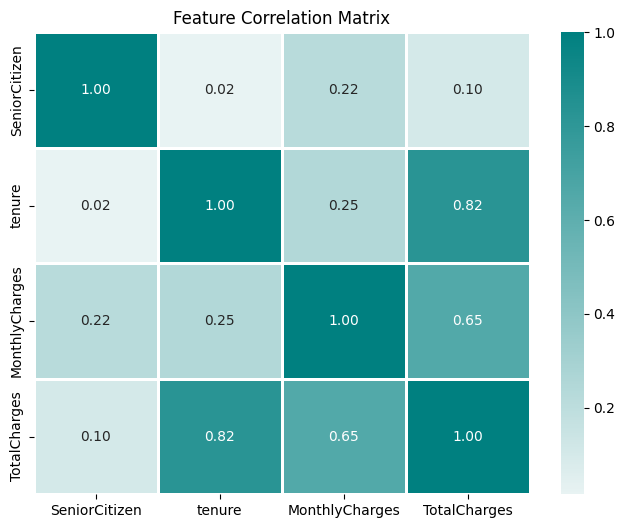

In [1900]:
plt.figure(figsize=(8, 6))

numeric_data = data.select_dtypes(include=[np.number])

sns.heatmap(numeric_data.corr(), annot=True, cmap=sns.light_palette("teal",as_cmap=True),linewidths=1,fmt=".2f")

plt.title('Feature Correlation Matrix')
plt.show()

---

### 🎯 Feature and Target Separation

At this stage, the dataset is divided into:

- **`X`**: All independent features (i.e., all columns except the target `'Churn'`).
- **`y`**: The target variable representing whether the customer churned or not.

This separation is crucial for training machine learning models, where:
- `X` will be used to **train the model** to identify patterns.
- `y` will serve as the **output the model tries to predict**.

In [ ]:
X = data.drop("Churn", axis=1)
y = data["Churn"]

---

### 🔤 Encoding Categorical Features

The dataset contains several categorical variables that need to be converted into numerical form for machine learning algorithms to process them.

Using **`pd.get_dummies()`**, we perform **one-hot encoding** on all categorical columns in `X`. This process creates binary (0/1) columns for each category in every categorical feature, making the data suitable for model training.

In [ ]:
X = pd.get_dummies(X)

---

### 🧪 Train-Test Split

We split the dataset into training and testing sets using `train_test_split`.

- `test_size=0.2`: 20% of the data is reserved for testing.
- `stratify=y`: Ensures that the class distribution (Churn vs. No Churn) is preserved in both the training and testing sets.
- `random_state=42`: Guarantees reproducibility of the split.

In [1903]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

---

### ⚖️ Handling Class Imbalance with SMOTE

To address class imbalance in the target variable (`Churn`), we applied **SMOTE (Synthetic Minority Over-sampling Technique)** on the training set:

- SMOTE generates synthetic examples of the minority class.
- This helps improve model performance by balancing the number of churned and non-churned samples.

> Applied only on the training data to prevent data leakage.

In [ ]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

---

### 🔢 Feature Scaling with StandardScaler

Before training, we scaled the features using **StandardScaler**:

- StandardScaler standardizes features by removing the mean and scaling to unit variance.
- This is important for distance-based and gradient-based models (e.g., KNN, SVM, Logistic Regression).

> The scaler was fitted on the **resampled training data** and then applied to both train and test sets.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

---

### 🤖 Model Training: Logistic Regression

We trained a **Logistic Regression** model using the resampled and scaled training data:

- `max_iter=1000` ensures convergence for larger datasets.
- The model was trained on the **balanced dataset** created by SMOTE to improve fairness across classes.

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(max_iter=1000)

---

### 🎯 Prediction with Custom Threshold

- The model predicts probabilities using `predict_proba()`, and we extract the probabilities for the **positive class** (churn = 1).
- A **custom threshold of 0.1** is applied to convert probabilities into binary predictions. This threshold is intentionally low to increase **recall**, capturing more churn cases even if it risks more false positives.

In [ ]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_probs >= 0.1).astype(int)

---

### 📊 Model Evaluation

- We converted the `y_test` labels from `"Yes"` / `"No"` to numeric values (`1` / `0`) for compatibility with evaluation metrics.
- We used `classification_report` and `confusion_matrix` to assess model performance based on the custom threshold (0.1).

In [ ]:
y_test_numeric = y_test.map({'No': 0, 'Yes': 1}).astype(int)

print(classification_report(y_test_numeric, y_pred))
print(confusion_matrix(y_test_numeric, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.48      0.64      1033
           1       0.40      0.95      0.56       372

    accuracy                           0.61      1405
   macro avg       0.68      0.72      0.60      1405
weighted avg       0.82      0.61      0.62      1405

[[496 537]
 [ 17 355]]


---

### 🔍 Recall After Using SMOTE

- We extracted the recall score specifically for the **positive class** (`churn = 1`) from the classification report.
- This gives us a focused measure of how well the model is identifying customers likely to churn.

📌 **Recall (Churn = 1):** Measures the model's ability to detect actual churners.

In [1909]:
y_test_numeric = y_test.map({'No': 0, 'Yes': 1}).astype(int)

report = classification_report(y_test_numeric, y_pred, output_dict=True)
print("Recall after Use Smote: {:.2f} %".format(report['1']['recall']))

Recall after Use Smote: 0.95 %


---

### 💾 Saving the Model and Artifacts

- We saved the trained **Logistic Regression model**, the **Scaler**, and the **Feature column names** using `joblib`.
- This allows us to reuse the model for predictions in a deployed app or future analysis.

✅ **Artifacts Saved:**
- `Logistic_model.pkl` → The trained model.
- `scaler.pkl` → StandardScaler fitted on the training data.
- `features.pkl` → The list of feature column names used during training.

In [1910]:
joblib.dump(model,"../Model/Logistic_model.pkl")
joblib.dump(scaler,"../Scaler/scaler.pkl")
joblib.dump(X_train.columns.tolist(),"../Features/features.pkl")

print("✅ Model and scaler saved.")

✅ Model and scaler saved.


---

## 📌 Conclusion

The churn prediction model achieved a **recall of 95%**, which indicates that it is highly effective at identifying customers who are likely to churn.

- ✅ **High Recall** means the model successfully captures most of the customers who will churn.
- 🔄 To achieve this, we applied **SMOTE** to balance the dataset and reduce bias toward the majority class.
- 🔍 The **Logistic Regression** model, combined with proper scaling and feature engineering, performed well on the test data.

This model can be effectively used in a real-world scenario to help the business take proactive actions to retain at-risk customers.